# Import Library

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import base64
import datetime
import urllib3 
from urllib.parse import urlencode
from collections import Counter
import string


# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials 

# import os
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir("/content/drive/MyDrive/Final_project")

#warnings
import warnings
warnings.filterwarnings("ignore")

In [229]:
df=pd.read_csv('sentiment.csv',index_col=[0])

In [168]:
import re
import random
import nltk
from scipy import sparse
from scipy.sparse import csr_matrix, vstack
from textblob import TextBlob
import pickle
from datetime import datetime

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [169]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oliviahan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/oliviahan/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [170]:
from nltk.corpus import stopwords
import string
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
# from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

snow_stemmer = SnowballStemmer(language='english') 


# Lyrics Data Cleaning

In [171]:
words = set(nltk.corpus.words.words())


In [ ]:
text_in_round_brackets = sum(list(df_sentiment['translate'].map(lambda s: re.findall(r'\((.*?)\)',s))), [])
print('Number of round brackets: {}'.format(len(text_in_round_brackets)))

Number of round brackets: 180258


In [ ]:
random.seed(0)
random.choices(text_in_round_brackets, k=20)

['Grra',
 'ey; hahaha',
 'Slay',
 'Ooh',
 'yes-ja',
 'Yeah',
 'Running on',
 'Pablo',
 'Yeah',
 'Huh',
 'Wo-oh-oh-ooh-oh, woo-ooh-ooh',
 'phew ',
 'Uh, plenty of potatoes everywhere',
 "It just don't matter",
 'fresh',
 'heavy heart',
 'i-insta',
 'Ooh, ooh, ooh',
 'Amen, amen',
 'Yeah']

In [ ]:
text_in_square_brackets = sum(list(df_sentiment['translate'].map(lambda s: re.findall(r'\[(.*?)\]',s))), [])
print('Number of square brackets: {}'.format(len(text_in_square_brackets)))

Number of square brackets: 9316


In [ ]:
random.seed(0)
random.choices(text_in_square_brackets, k=20)

['Chorus: Pop Smoke',
 'Chorus',
 'Pre-Chorus',
 'Verse: Kendrick Lamar',
 'Refrain: Chester Bennington & Mike Shinoda',
 'Verse 1',
 'Bridge: Dalmata',
 'Post-Chorus',
 'Bridge',
 'Refrain: Ariana Grande',
 'Hook',
 'Chorus: Chester Bennington & Mike Shinoda',
 'Chorus',
 'Chorus',
 'Chorus',
 'Skit/Outro',
 'Chorus: Wiz Khalifa',
 'Verse 1: Tyga',
 'Pre-Chorus',
 'Pre-Chorus']

In [ ]:
text_in_curly_brackets = sum(list(df_sentiment['translate'].map(lambda s: re.findall(r'\{(.*?)\}',s))), [])
print('Number of square brackets: {}'.format(len(text_in_curly_brackets)))

Number of square brackets: 494


In [ ]:
random.seed(0)
random.choices(text_in_curly_brackets, k=20)

['*Marilyn laughing*',
 'Oh, take me baby',
 '\u200bMusic Video - Break',
 'Hey, hey, hey',
 '\u200b\u200bSo many games',
 'Instrumental bridge',
 'Pre',
 'Ayer, ay-ayer, ayer, ay-ayer',
 'Rock the beat',
 '"one"',
 'volt car until the cloche is broken {band:',
 '\u200b\u200bI could remember',
 'ayy-yeah',
 "I'm never with a crowd",
 'Bridge',
 'They mad',
 'volt Klabe pa that the mommy joy (band :) to the color of the stars {volt She because you left {voltio:',
 '*inhaling*',
 'scratching',
 "volt I wore the n'klabe voltage, this is n'klabe with the bandillaje but two and this that I bring you this n'klabe repeatmelo voltio and what I bring you this n'klabe {band:"]

## Translate API

In [ ]:
pip install translators --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 5.2 MB/s 
     |████████████████████████████████| 76 kB 3.9 MB/s 
     |████████████████████████████████| 62 kB 637 kB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 115 kB 10.9 MB/s 
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-py3-none-any.whl size=14598 sha256=0882281383d623a52e91ee1f1bffc2fe77834a351890fcf094d7f7aaff50e036
  Stored in directory: /root/.cache/pip/wheels/9a/ee/03/da5c0b4a8c13362beeb844eb913bbe58a89bde1de2b9157007
Successfully built PyExecJS
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import translators as ts


Using state South Carolina server backend.


In [ ]:
df=pd.read_csv('ready_to_clean.csv',index_col=[0])

In [ ]:
df.shape

(27550, 18)

In [ ]:
df.reset_index(drop=True, inplace=True)


In [ ]:
def translate(text):
  result = ts.google(text, to_language='en')
  return result


In [ ]:
# df.to_csv('translate.csv')

## Clean up lyrics

* First glance at the lyrics: I found that text in the square bracket are mostly not related to the lyrics.

In [14]:
df_sentiment=df.copy()

In [15]:
df_sentiment.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [ ]:
# remove square brackest and text within
df_sentiment['clean_lyrics'] = df_sentiment['translate'].map(lambda s: re.sub(r'\[(.*?)\]', '', s))

In [ ]:
text_in_square_brackets = sum(list(df_sentiment['clean_lyrics'].map(lambda s: re.findall(r'\[(.*?)\]',s))), [])
print('Number of square brackets: {}'.format(len(text_in_square_brackets)))

Number of square brackets: 0


In [ ]:
text_in_round_brackets = sum(list(df_sentiment['clean_lyrics'].map(lambda s: re.findall(r'\((.*?)\)',s))), [])
print('Number of round brackets: {}'.format(len(text_in_round_brackets)))

Number of round brackets: 0


In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
df_sentiment['clean_lyrics'] = df_sentiment['clean_lyrics'].map(tokenizer.tokenize)

In [174]:
def clean_lyrics(lyrics):

  #remove square bracket and everything inside
  lyrics = re.sub(r'\[(.*?)\]', '', lyrics,flags=re.IGNORECASE)


  # remove apostrophes
  lyrics = re.sub(r'[\(\[].*?[\)\]]', '', lyrics,flags=re.IGNORECASE)

  lyrics = lyrics.replace('\'', '')
  # replace all punctuations with spaces
  lyrics = re.sub(r'[^\w\s]', ' ', lyrics)
  lyrics=re.sub(r'.oh', '',lyrics,flags=re.IGNORECASE)
  lyrics=re.sub(r'la', '',lyrics,flags=re.IGNORECASE)
  lyrics=re.sub(r'diddily', '',lyrics,flags=re.IGNORECASE)
  lyrics=re.sub(r'yeah', '',lyrics,flags=re.IGNORECASE)
  lyrics=re.sub(r'nah', '',lyrics,flags=re.IGNORECASE)

  lyrics=re.sub(r'^na$', '',lyrics,flags=re.IGNORECASE)
  lyrics=re.sub(r'^[a-zA-Z0-9]+(-[a-zA-Z0-9]+)*$', '',lyrics,flags=re.IGNORECASE)



  lyrics = re.sub(r'[\(\[].*?[\)\]]', '', lyrics,flags=re.IGNORECASE)

  lyrics = re.sub(r'/\[Intro.*?\]/g', '', lyrics,flags=re.IGNORECASE)
  lyrics = re.sub(r'/\[Verse.*?\]/g', '', lyrics,flags=re.IGNORECASE)
  lyrics = re.sub(r'/\[Chorus.*?\]/g', '', lyrics,flags=re.IGNORECASE)
  lyrics = re.sub(r'/\[Pre-Chorus.*?\]/g', '', lyrics,flags=re.IGNORECASE)
  lyrics = re.sub(r'/\[Bridge.*?\]/g', '', lyrics,flags=re.IGNORECASE)
  lyrics = re.sub(r'/\[Outro.*?\]/g', '', lyrics,flags=re.IGNORECASE)


        
  # replace consecutive whitespaces with single space
  lyrics = re.sub(r'\s+', ' ', lyrics)

  add_stop_words = ['baby','yeah','wanna','well','thing','yeah','these','pre','ah','cause','did','gonna','aint','gonna',
                'em','gon','ayy','uh','wont','said','ya','la','eh','ya','gotta','got','youre','ive','come','way',
                'come','say','huh','oh','ill','thats','wa','let','ooh','nah','yuh','tell','want','time','ima',
                'really','youve','look','stop','new','mi','yo','el','da','na','away','que','ha','hey','en','te','lo',
                'ey','soy','yeh','boy','girl','bout','kendrick','lamar','man','bad','good','right']
  # stop_words = set(stopwords.words('english'))
  stop_words=add_stop_words
  exclude = set(string.punctuation)
  lemma = WordNetLemmatizer() 
  snow_stemmer = SnowballStemmer(language='english') 

  lyrics_stop_words = [i for i in lyrics.lower().split() if i not in stop_words]
  result = [ch for ch in lyrics_stop_words if ch not in exclude]
  # normalized = " ".join(lemma.lemmatize(word) for word in result.split())
  # normalized = " ".join(snow_stemmer.stem(word) for word in result)
  normalized = " ".join(word for word in result)


  return normalized


In [18]:
df_sentiment['lyrics']=df_sentiment['lyrics'].astype('str')

In [19]:
df_sentiment['clean']=df_df_sentiments['lyrics'].apply(lambda x: clean_lyrics(x))

In [ ]:
df_sentiment['lyrics_for_sent']=df_sentiment['translate'].apply(lambda x: clean_lyrics(x))

In [ ]:
counter = 0
df_genre['token_freq'] = df_genre['token']
for w in df_genre['token_freq']: 
    word_counter = dict()
    for a in w:
        if a in word_counter:
            word_counter[a] += 1
        else:
            word_counter[a] = 1
    df_genre.iloc[counter].at['token_freq'] = sorted(word_counter, key = word_counter.get, reverse = True)[:50]
    counter += 1

In [22]:
df_s['most_common']=""
for index, row in df_s.iterrows():
  found=Counter(row['clean'].split()).most_common(50)
  df_s['most_common'][index] = [x[0] for x in found]

# Lyrics Sentiment Analysis

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 24.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=93289efd158ac250ab3d792a000ce5473b261bf0f367c7e5ccc77090807b3ca6
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [230]:
# import libraries
import pandas as pd
# import plotly.express as px
# import plotly.graph_objects as go
import numpy as np
import re
import random
import nltk
from scipy import sparse
from scipy.sparse import csr_matrix, vstack
# from textblob import TextBlob
# from textblob.sentiments import NaiveBayesAnalyzer

# from langdetect import detect_langs
import pickle
from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift
from sklearn import preprocessing

In [232]:
df

artist            track_name  \
0      Jason Derulo                Swalla   
1      Jason Derulo            Talk Dirty   
2      Jason Derulo                Wiggle   
3      Jason Derulo              Trumpets   
4      Jason Derulo               Tip Toe   
...             ...                   ...   
24704   Ronnie Dunn        Tattooed Heart   
24705     Ava Raiin             Eagle Eye   
24706   Grant Terry                    Go   
24707   Sonia Stein               Coexist   
24708      Timo Odv  Save Me - Radio Edit   

                                                  lyrics  popularity  \
0      Drank Young Money   Love in a thousand differe...        77.0   
1      (Jason, haha Jason Derulo) Haha, get Jazzy on ...        66.0   
2      Ayo, Jason (Oh yeah!) Say somethin to her, hol...        59.0   
3      Every time that you get undressed I hear symph...        65.0   
4      Derulo Whine fa me darlin Way you move ya spin...        65.0   
...                                                  ...         ...   
24704  You don't need a lot of money Well, you don't ...        35.0   
24705  Eagle Eye Seasons come and seasons go I weathe...         5.0   
24706  Today marks a year from the day I met ya I can...         0.0   
24707  How can these two feelings coexist inside my c...        49.0   
24708  I haven't done anything lately Instead I think...         1.0   

       acousticness  danceability  energy  instrumentalness  liveness  \
0            0.0750         0.696   0.817          0.000000    0.1870   
1            0.0750         0.696   0.817          0.000000    0.1870   
2            0.0750         0.696   0.817          0.000000    0.1870   
3            0.0750         0.696   0.817          0.000000    0.1870   
4            0.0750         0.696   0.817          0.000000    0.1870   
...             ...           ...     ...               ...       ...   
24704        0.1790         0.373   0.587          0.000000    0.1090   
24705        0.1060         0.541   0.668          0.000243    0.1020   
24706        0.0309         0.583   0.613          0.000000    0.0637   
24707        0.2020         0.677   0.482          0.000188    0.1040   
24708        0.3180         0.733   0.696          0.000075    0.0988   

       loudness  ...                track_id  \
0        -3.862  ...  6kex4EBAj0WHXDKZMEJaaF   
1        -3.862  ...  6g6A7qNhTfUgOSH7ROOxTD   
2        -3.862  ...  2sLwPnIP3CUVmIuHranJZU   
3        -3.862  ...  5KONnBIQ9LqCxyeSPin26k   
4        -3.862  ...  2z4pcBLQXF2BXKFvd0BuB6   
...         ...  ...                     ...   
24704    -6.996  ...  3nfVBXYJtRWeNxHMSMvIsE   
24705    -8.702  ...  1CwRFMS5BYudsGXaY0k48M   
24706    -4.786  ...                     NaN   
24707    -9.875  ...                     NaN   
24708    -7.327  ...                     NaN   

                                                   clean  \
0      drank young money love thousand differ fvor wi...   
1      haha get jazzi em im flight get intern first c...   
2      ayo jason say somethin hol haha got one questi...   
3      everi time get undress hear symphoni head wrot...   
4      derulo whine fa darlin way move ya spine armin...   
...                                                  ...   
24704  dont need lot money well dont py game need lov...   
24705  eagl eye season come season go weather cold wi...   
24706  today mark year day met ya cant think someday ...   
24707  two feel coexist insid chest there much room b...   
24708  havent done anyth teli instead think dream nig...   

                                                   token Positive Sentiment  \
0      ['drank', 'young', 'money', 'love', 'thousand'...           0.125001   
1      ['haha', 'get', 'jazzi', 'em', 'im', 'flight',...           0.065001   
2      ['ayo', 'jason', 'say', 'somethin', 'hol', 'ha...           0.092001   
3      ['everi', 'time', 'get', 'undress', 'hear', 's...           0.030001   
4      ['derulo', 'whine', 'fa', 'dar

## using NLTK's Vader Sentiment analyzer

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/oliviahan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df_spotify=df_sentiment.copy()

In [59]:
 
df_spotify['s']=df_spotify['clean'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))


In [60]:
df_spotify['Positive Sentiment']= df_spotify['s'].apply(lambda x: x['pos']+1*(10**-6)) 
df_spotify['Neutral Sentiment']= df_spotify['s'].apply(lambda x: x['neu']+1*(10**-6))
df_spotify['Negative Sentiment']= df_spotify['s'].apply(lambda x: x['neg']+1*(10**-6))

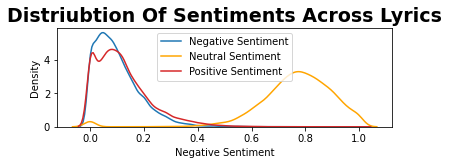

In [61]:

plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Lyrics',fontsize=19,fontweight='bold')
sns.kdeplot(df_spotify['Negative Sentiment'],label='Negative Sentiment')
sns.kdeplot(df_spotify['Neutral Sentiment'] ,label='Neutral Sentiment' ,color='orange' )
sns.kdeplot(df_spotify['Positive Sentiment'],label='Positive Sentiment',color='tab:red')
plt.legend()


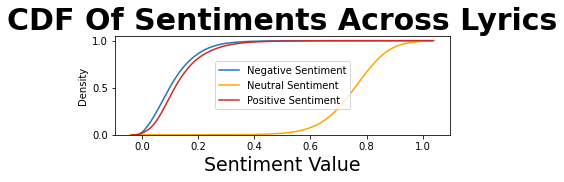

In [ ]:

plt.subplot(2,1,2)
plt.figsize
plt.title('CDF Of Sentiments Across Lyrics',fontsize=19,fontweight='bold')
sns.kdeplot(df_spotify['Negative Sentiment'],cumulative=True,label='Negative Sentiment')
sns.kdeplot(df_spotify['Neutral Sentiment'],cumulative=True,label='Neutral Sentiment' ,color='orange' )
sns.kdeplot(df_spotify['Positive Sentiment'],cumulative=True ,label='Positive Sentiment',color='tab:red')
plt.xlabel('Sentiment Value',fontsize=19)
plt.legend()
plt.show()

In [ ]:
df_spotify['dominant_sentiment']=""
df_spotify['dominant_sentiment_score']=""


In [28]:
for index, row in df_s.iterrows():
    if row['Negative Sentiment'] >row['Positive Sentiment']:
        df_spotify['dominant_sentiment'][index] = 'Negative'
        df_spotify['dominant_sentiment_score'][index]=row['Negative Sentiment']

    elif row['Positive Sentiment'] >row['Negative Sentiment']:
        df_spotify['dominant_sentiment'][index] = 'Positive'
        df_spotify['dominant_sentiment_score'][index]=row['Positive Sentiment']

    else:
        df_spotify['dominant_sentiment'][index] = 'Neutral'
        df_spotify['dominant_sentiment_score'][index]=row['Neutral Sentiment']

In [16]:
positivedf = pd.Series((df_spotify[df_spotify['dominant_sentiment']=='Positive']['clean']).tolist())
negativedf = pd.Series((df_spotify[df_spotify['dominant_sentiment']=='Negative']['clean']).tolist())
neutraldf = pd.Series((df_spotify[df_spotify['dominant_sentiment']=='Neutral']['clean']).tolist())

In [21]:
import matplotlib.pyplot as plt

positive="".join(list(positivedf))
negative="".join(list(negativedf))
# neutral="".join(list(neutraldf))

In [60]:
# conda install -c conda-forge wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [22]:
stop_words = set(stopwords.words('english'))
# wc_neu = WordCloud(width=900, height=900, stopwords=stop_words).generate(neutral)
wc_pos = WordCloud(width=900, height=900, stopwords=stop_words).generate(positive)
wc_neg = WordCloud(width=900, height=900, stopwords=stop_words).generate(negative)

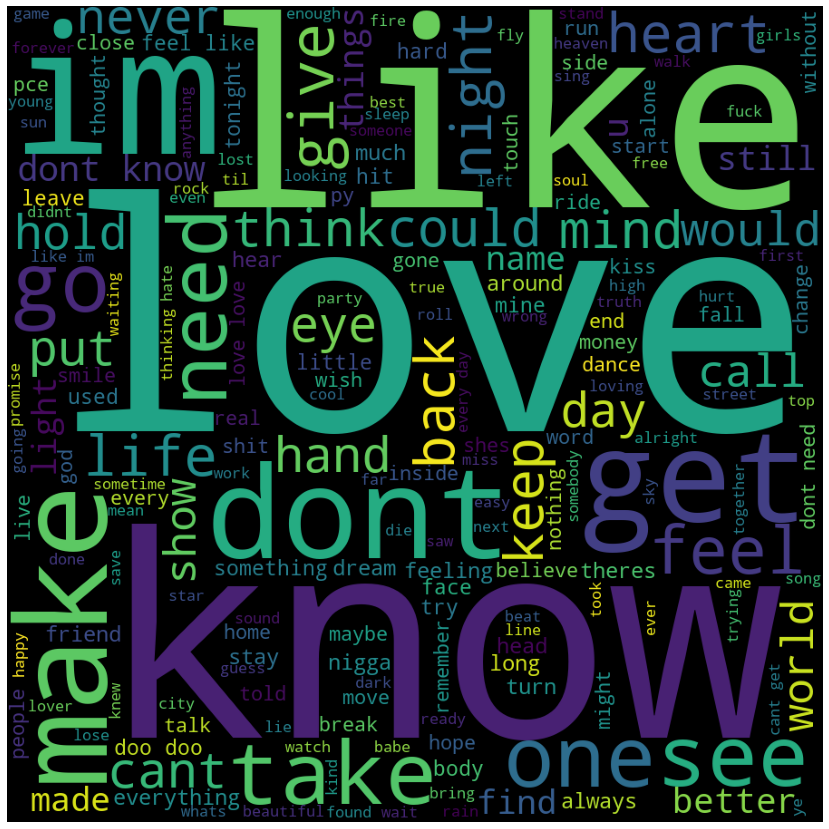

In [23]:
plt.figure(figsize=(15, 15))
plt.imshow(wc_pos)

plt.axis("off")
plt.show()

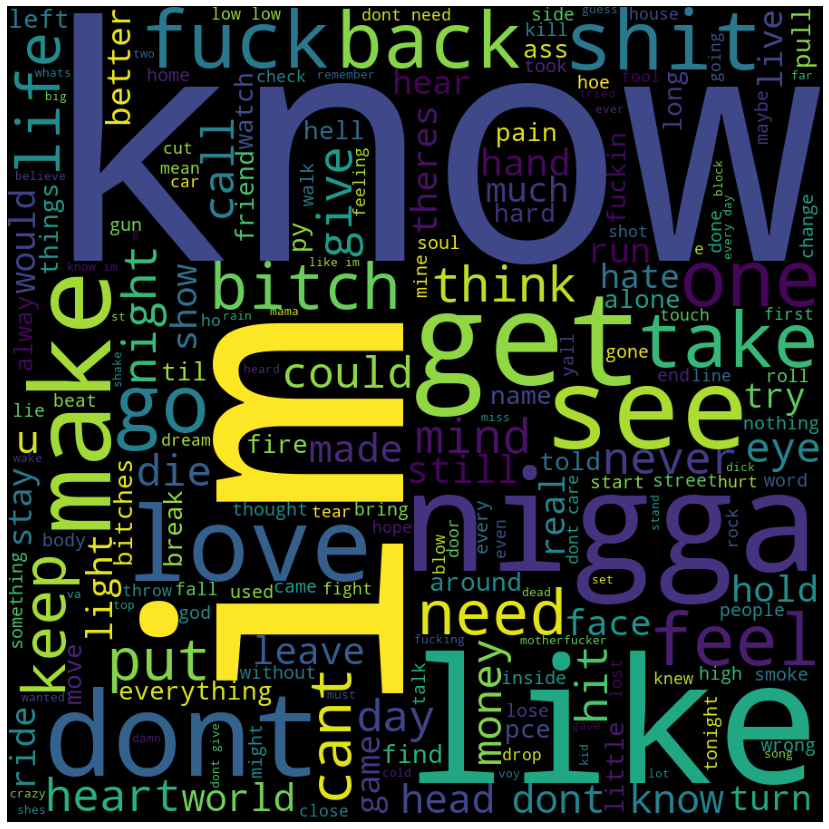

In [24]:
plt.figure(figsize=(15, 15))
plt.imshow(wc_neg)

plt.axis("off")
plt.show()

In [ ]:
df_s.to_csv('sentiment.csv')

# EDA

## audio feature

In [62]:
import plotly.graph_objects as go


In [73]:
import plotly.offline as pyo
pyo.init_notebook_mode()

In [71]:
feature=['acousticness','danceability','energy',
         'instrumentalness','liveness','loudness',
         'speechiness','tempo','valence']
dff=df_spotify[df_spotify['artist'].isin(top_10_artist)][feature]
# function that plots radar chart
def plot_radarchart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster{df.index[i]}',
                                    fill = 'toself'))


    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px 

## Lyrics and Audio Sentiment

In [194]:
dff=pd.read_csv('sentiment.csv')

In [198]:

# checking most recurrent artists in Brazil
n = 10
print(" Artists with most songs")
top_10_artist=list(dff['artist'].value_counts()[:n].index)
top_10_artist

 Artists with most songs


['Queen',
 'Drake',
 'Logic',
 'The Beatles',
 'Future',
 'Maroon 5',
 'Taylor Swift',
 'Foo Fighters',
 'Demi Lovato',
 'Ariana Grande']

In [186]:
df[df['artist']=='Drake'][['valence','dominant_sentiment']]

valence dominant_sentiment
6815    0.782           Negative
6816    0.782           Negative
6817    0.782           Positive
6818    0.782           Positive
6819    0.782           Positive
...       ...                ...
6929    0.382           Positive
6930    0.101           Negative
6931    0.450           Negative
6932    0.459           Positive
6933    0.849           Negative

[119 rows x 2 columns]

In [187]:
import plotly.express as px


In [36]:
df_spotify.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [38]:
df_spotify=df_spotify.rename(columns={'track_artist':'artist',
                           'track_popularity':'popularity',
                           'track_album_release_date':'release_date',    
})

In [31]:
df_sentiment_artist=df_spotify[df_spotify['artist'].isin(top_10_artist)][['valence','dominant_sentiment']]

In [127]:
df_spotify.describe()

popularity  danceability        energy           key      loudness  \
count  18454.000000  18454.000000  18454.000000  18454.000000  18454.000000   
mean      42.438821      0.644066      0.692289      5.342094     -6.769159   
std       24.616740      0.150071      0.180635      3.613121      2.920757   
min        0.000000      0.098500      0.016700      0.000000    -34.283000   
25%       24.000000      0.546000      0.573000      2.000000     -8.249000   
50%       48.000000      0.660000      0.715000      6.000000     -6.227000   
75%       62.000000      0.755000      0.835000      9.000000     -4.719000   
max      100.000000      0.979000      1.000000     11.000000      1.275000   

               mode   speechiness  acousticness  instrumentalness  \
count  18454.000000  18454.000000  18454.000000      18454.000000   
mean       0.580525      0.106192      0.175348          0.051216   
std        0.493487      0.102291      0.217795          0.168263   
min        0.000000      0.022400      0.000001          0.000000   
25%        0.000000      0.039700      0.016100          0.000000   
50%        1.000000      0.060300      0.081900          0.000009   
75%        1.000000      0.130000      0.254000          0.001720   
max        1.000000      0.918000      0.992000          0.987000   

           liveness       valence         tempo    duration_ms  \
count  18454.000000  18454.000000  18454.000000   18454.000000   
mean       0.189593      0.520598    120.812167  230319.306763   
std        0.153751      0.228716     27.586424   57255.086685   
min        0.009360      0.000010     37.114000   31893.000000   
25%        0.092700      0.345000     98.856000  193230.250000   
50%        0.128000      0.522000    120.045000  221340.000000   
75%        0.246000      0.700000    135.984000  258078.250000   
max        0.996000      0.991000    214.047000  517810.000000   

       Positive Sentiment  Neutral Sentiment  Negative Sentiment  \
count        18454.000000       18454.000000        18454.000000   
mean             0.120664           0.760460            0.102400   
std              0.101439           0.154441            0.085718   
min              0.000001           0.000001            0.000001   
25%              0.047001           0.694001            0.040001   
50%              0.101001           0.776001            0.085001   
75%              0.169001           0.857001            0.145001   
max              1.000001           1.000001            1.000001   

       dominant_sentiment_score  
count              18454.000000  
mean                   0.185271  
std                    0.155602  
min                    0.000001  
25%                    0.102001  
50%                    0.154001  
75%                    0.222001  
max                    1.000001

In [137]:
sample=df_spotify[df_spotify['dominant_sentiment']!='Neutral']

In [38]:
df_spotify[['valence','dominant_sentiment']]

valence dominant_sentiment
0        0.566            Neutral
1        0.404           Positive
2        0.650           Negative
3        0.405           Positive
4        0.240           Negative
...        ...                ...
18449    0.211           Positive
18450    0.647           Negative
18451    0.657           Positive
18452    0.810           Positive
18453    0.221            Neutral

[18454 rows x 2 columns]

In [ ]:
df=pd.read_csv('sentiment.csv',index_col=[0])

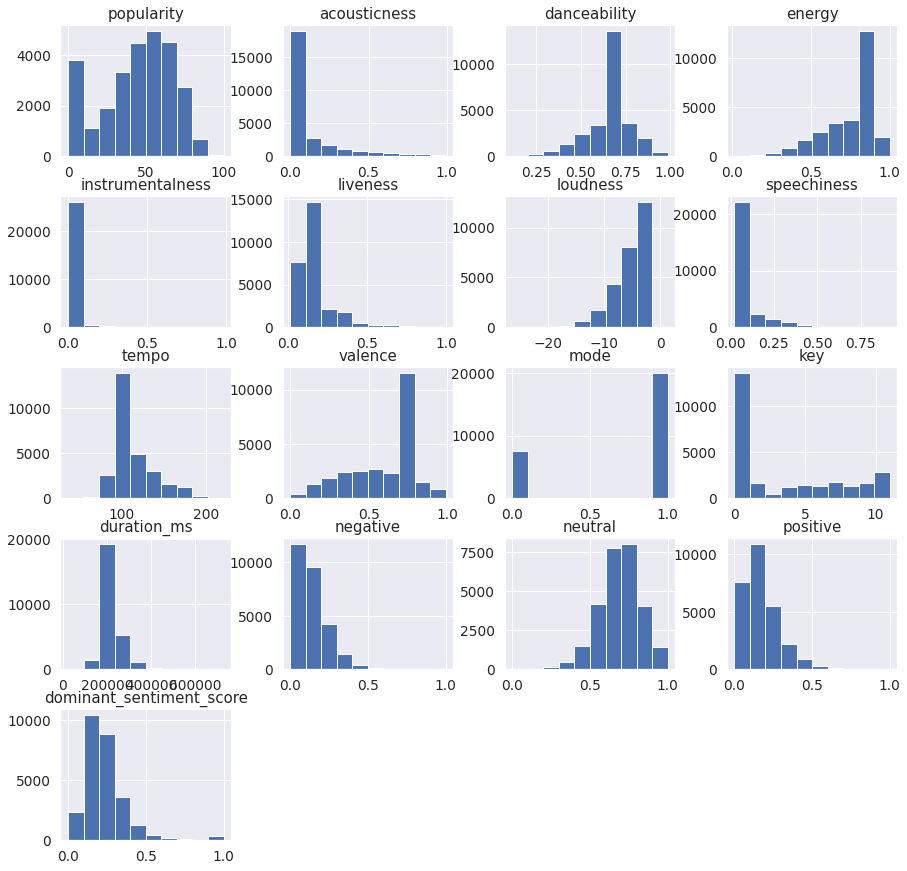

In [ ]:
df.hist(figsize = (15,15))
plt.show()

In [ ]:
df.isnull().sum()


artist                 0
track_name             0
lyrics                 0
popularity             0
acousticness           0
danceability           0
energy                 0
instrumentalness       0
liveness               0
loudness               0
speechiness            0
tempo                  0
valence                0
genre                  0
mode                   0
key                    0
duration_ms            0
translate              0
clean_lyrics          13
release_year           0
track_id            2270
dtype: int64

## release date to year

In [146]:
df_spotify.columns

Index(['track_id', 'track_name', 'artist', 'lyrics', 'popularity',
       'track_album_id', 'track_album_name', 'release_date', 'playlist_name',
       'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'language', 'clean', 's', 'Positive Sentiment', 'Neutral Sentiment',
       'Negative Sentiment', 'dominant_sentiment', 'dominant_sentiment_score'],
      dtype='object')

In [ ]:
df['release_date'][27549][:4]

'2008'

In [ ]:
df['release_year']=[x[:4] for x in df['release_date']]

In [148]:
import datetime
df_spotify['release_year']=pd.to_datetime(df_spotify['release_date'])


In [149]:
df_spotify['release_year']=df_spotify['release_year'].dt.year

## Distribution Plot

In [ ]:
dff=df[df['popularity']!=0]

In [ ]:
df.describe()

popularity  acousticness  danceability        energy  \
count  25235.000000  25235.000000  25235.000000  25235.000000   
mean      42.604359      0.143398      0.662277      0.735168   
std       22.871253      0.184610      0.121972      0.156940   
min        0.000000      0.000001      0.116000      0.016700   
25%       29.000000      0.051550      0.613000      0.657000   
50%       46.000000      0.075000      0.696000      0.817000   
75%       60.000000      0.144000      0.696000      0.817000   
max       98.000000      0.992000      0.979000      1.000000   

       instrumentalness      liveness      loudness   speechiness  \
count      25235.000000  25235.000000  25235.000000  25235.000000   
mean           0.026974      0.188715     -5.688062      0.108592   
std            0.120457      0.122150      2.694712      0.082905   
min            0.000000      0.015500    -26.279000      0.022400   
25%            0.000000      0.111000     -6.945000      0.050000   
50%            0.000000      0.187000     -4.432000      0.109000   
75%            0.000051      0.187000     -3.862000      0.109000   
max            0.982000      0.996000      1.275000      0.918000   

              tempo       valence          mode           key    duration_ms  \
count  25235.000000  25235.000000  25235.000000  25235.000000   25235.000000   
mean     112.279831      0.615356      0.739925      3.715197  224455.895978   
std       24.612318      0.221470      0.438684      3.546139   46046.754544   
min       37.114000      0.000010      0.000000      0.000000   24006.000000   
25%       98.064000      0.445000      0.000000      1.000000  208675.500000   
50%       98.064000      0.732000      1.000000      1.000000  216409.000000   
75%      126.035500      0.782000      1.000000      7.000000  232566.500000   
max      220.065000      0.990000      1.000000     11.000000  727107.000000   

       release_year  
count  25235.000000  
mean    2010.392986  
std       10.942560  
min     1957.000000  
25%     2006.000000  
50%     2015.000000  
75%     2018.000000  
max     2022.000000

In [197]:
import plotly.express as px
import plotly.figure_factory as ff
hist_data = [df['popularity']]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()


Text(0.5, 1.0, 'Popularity Distribution')

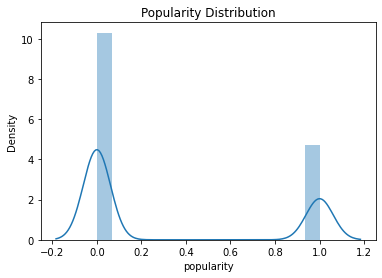

In [ ]:
sns.distplot(dff['popularity']).set_title('Popularity Distribution')


Text(0.5, 1.0, 'duration Distribution')

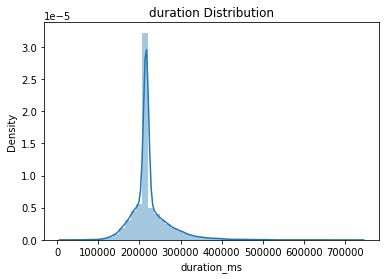

In [ ]:
sns.distplot(df['duration_ms']).set_title('duration Distribution')


Text(0.5, 1.0, 'acousticness Distribution')

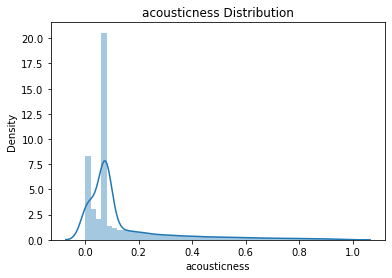

In [ ]:
sns.distplot(df['acousticness']).set_title('acousticness Distribution')

Text(0.5, 1.0, 'Popularity Based on Key')

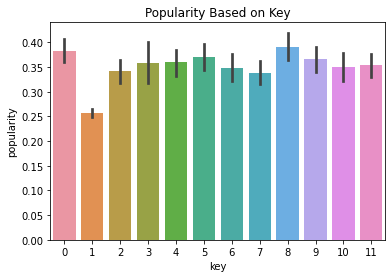

In [ ]:
sns.barplot(x = 'key', y = 'popularity', data = df)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

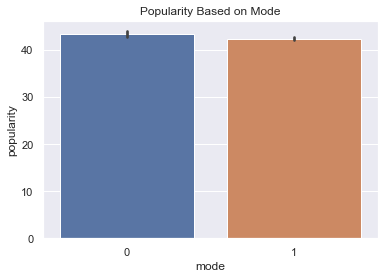

In [206]:
sns.barplot(x = 'mode', y = 'popularity', data = df)
plt.title('Popularity Based on Mode')

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
sns.set()

In [ ]:
df_cluster=df_spotify.drop(['track_id','track_name','release_year','lyrics',
        'genre','translate', 'clean_lyrics', 'Positive Sentiment', 'Neutral Sentiment',
       'Negative Sentiment'],axis=1)

In [155]:
df_spotify.columns

Index(['track_id', 'track_name', 'artist', 'lyrics', 'popularity',
       'track_album_id', 'track_album_name', 'release_date', 'playlist_name',
       'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'language', 'clean', 's', 'Positive Sentiment', 'Neutral Sentiment',
       'Negative Sentiment', 'dominant_sentiment', 'dominant_sentiment_score',
       'release_year'],
      dtype='object')

In [156]:
features=['danceability','energy', 'key', 'loudness', 'mode', 
 'speechiness', 'acousticness','release_year','playlist_genre',
 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
 'dominant_sentiment', 'dominant_sentiment_score']

In [158]:
df_cluster=df_spotify[features].copy()

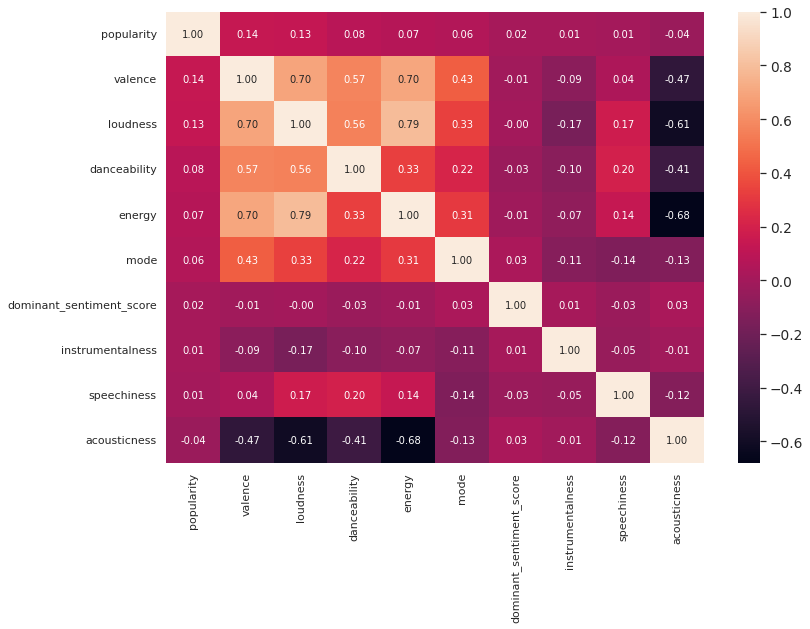

In [ ]:
# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(df_cluster[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

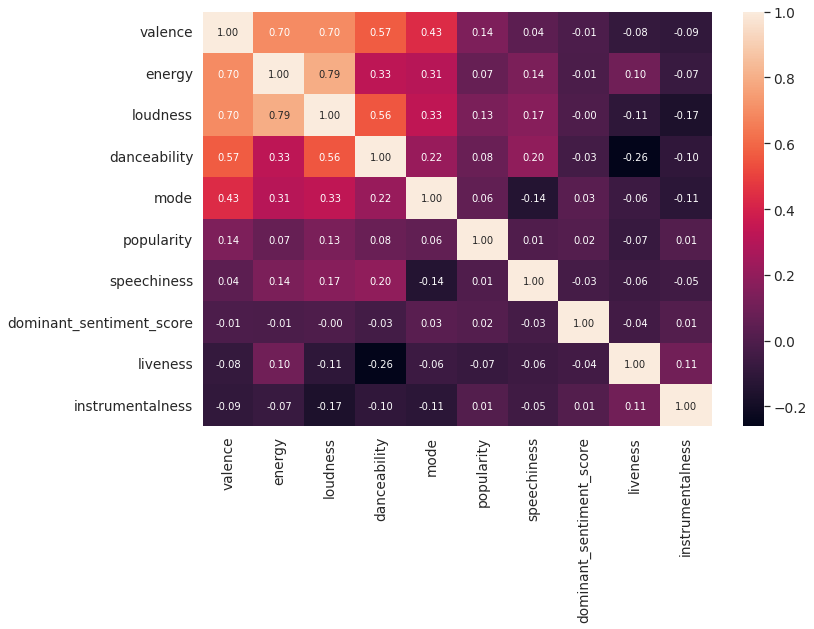

In [ ]:
# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'valence')['valence'].index
cm = np.corrcoef(df_cluster[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

In [159]:
df_cluster.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'release_year', 'playlist_genre', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'dominant_sentiment',
       'dominant_sentiment_score'],
      dtype='object')

In [92]:
df_cluster=df_spotify.drop(['language', 'dominant_sentiment','artist', 'track_id','track_name','lyrics',
          'track_album_id', 'track_album_name','clean','playlist_genre', 'playlist_subgenre',
                            'release_date', 'playlist_name',
       'playlist_id','Positive Sentiment', 'Neutral Sentiment',
       'Negative Sentiment','s', 'playlist_subgenre', ],axis=1)

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

pca_pipeline = Pipeline([('scaler', StandardScaler()), 
                             ('pca', PCA(n_components=2))])

X = df_cluster
X_scale=scaler.fit_transform(X)
# pca_pipeline.fit(X)
principal_components=pca.fit_transform(X_scale)

# principal_components = pca_pipeline.fit_transform(X)
df_pca = pd.DataFrame(principal_components)
df_pca.columns = ['pc1', 'pc2']


In [94]:
df_pca

pc1       pc2
0      1.843990  0.881745
1     -1.444323  3.074225
2     -0.613680 -0.828260
3      2.259785  0.667764
4     -1.687859  0.128378
...         ...       ...
18449 -1.088580  1.281739
18450 -0.146256 -1.336127
18451  1.447655  0.227346
18452 -0.369690 -1.580370
18453  0.679471  1.720849

[18454 rows x 2 columns]

In [95]:
# target = df['genre']
target = df_spotify['playlist_genre']


In [96]:
df_pca['Cluster']=target

In [97]:
pca.explained_variance_ratio_


array([0.15547362, 0.11601172])

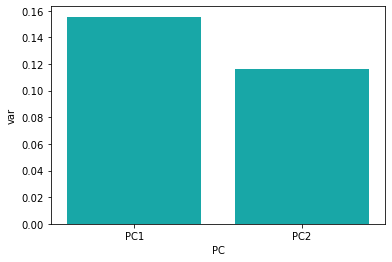

In [98]:
dff = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2']})
sns.barplot(x='PC',y="var", 
           data=dff, color="c");

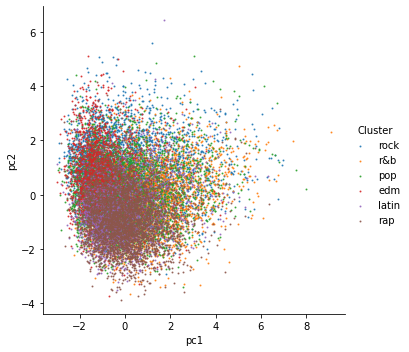

In [99]:
sns.lmplot( x="pc1", y="pc2",
  data=df_pca, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 1}) # specify the point size


In [100]:
Target = target[:5000]

In [ ]:
layout = dict(title = 'PCA (Principal Component Analysis)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

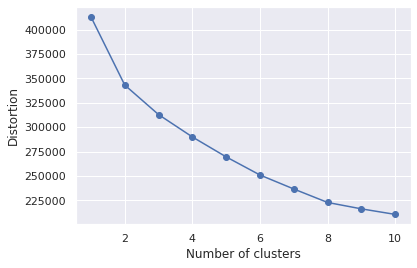

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
norm_df=(df_cluster-df_cluster.mean())/df_cluster.std()
#elbow rule
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

plot_distortion(norm_df)


In [ ]:
df.genre.nunique()

8

In [107]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline


In [ ]:
norm_df

popularity  acousticness  danceability    energy  instrumentalness  \
0        1.420674     -0.377664      0.269638  0.548043         -0.220237   
1        0.948701     -0.377664      0.269638  0.548043         -0.220237   
2        0.648354     -0.377664      0.269638  0.548043         -0.220237   
3        0.905794     -0.377664      0.269638  0.548043         -0.220237   
4        0.905794     -0.377664      0.269638  0.548043         -0.220237   
...           ...           ...           ...       ...               ...   
27545    0.862887     -0.660369     -1.912552 -1.420953         -0.220205   
27546    1.206141     -0.238978      0.656151 -0.093611         -0.220237   
27547   -1.883141     -0.748114     -1.477725  0.441101         -0.220237   
27548   -0.166874      3.036134     -1.646824 -1.194487         -0.216599   
27549    0.734167      0.379773      0.011962 -1.213359         -0.220213   

       liveness  loudness  speechiness     tempo   valence      mode  \
0     -0.006810  0.698189    -0.000727 -0.597960  0.786036  0.616866   
1     -0.006810  0.698189    -0.000727 -0.597960  0.786036  0.616866   
2     -0.006810  0.698189    -0.000727 -0.597960  0.786036  0.616866   
3     -0.006810  0.698189    -0.000727 -0.597960  0.786036  0.616866   
4     -0.006810  0.698189    -0.000727 -0.597960  0.786036  0.616866   
...         ...       ...          ...       ...       ...       ...   
27545  1.420343 -1.594037    -0.913712  2.106434 -0.904067  0.616866   
27546 -0.777959 -0.138300     2.846468  1.673118 -1.185008  0.616866   
27547  1.193296 -0.016989    -0.250151  0.597411 -1.760267 -1.621039   
27548 -0.590645 -0.270436    -0.965479  1.164442  0.228614 -1.621039   
27549 -0.566319 -0.099854    -0.941949  0.079994 -1.715674  0.616866   

            key  duration_ms  release_year   cluster  
0     -0.794548    -0.177226      0.588975 -0.881057  
1     -0.794548    -0.177226      0.219976 -0.881057  
2     -0.794548    -0.177226      0.219976 -0.881057  
3     -0.794548    -0.177226      0.219976 -0.881057  
4     -0.794548    -0.177226      0.588975 -0.881057  
...         ...          ...           ...       ...  
27545  1.442100    -1.484045      0.681224  1.431637  
27546 -1.074129    -0.966033      0.588975 -0.418518  
27547  1.721681    -0.344155      0.312226  1.431637  
27548  0.323776    -0.719891      0.219976  1.894176  
27549 -0.514967     0.932715     -0.241272  1.431637  

[27550 rows x 15 columns]

In [ ]:
#number of clusters to be taken as 5


km=KMeans(n_clusters=8, init = 'k-means++', n_init=10,random_state=0)
y_km=km.fit_predict(norm_df)

df_km=pd.DataFrame(norm_df, columns=list(norm_df.columns))
df_km['cluster'] = y_km

df_km.head()

popularity  acousticness  danceability    energy  instrumentalness  \
0    1.420674     -0.377664      0.269638  0.548043         -0.220237   
1    0.948701     -0.377664      0.269638  0.548043         -0.220237   
2    0.648354     -0.377664      0.269638  0.548043         -0.220237   
3    0.905794     -0.377664      0.269638  0.548043         -0.220237   
4    0.905794     -0.377664      0.269638  0.548043         -0.220237   

   liveness  loudness  speechiness    tempo   valence      mode       key  \
0  -0.00681  0.698189    -0.000727 -0.59796  0.786036  0.616866 -0.794548   
1  -0.00681  0.698189    -0.000727 -0.59796  0.786036  0.616866 -0.794548   
2  -0.00681  0.698189    -0.000727 -0.59796  0.786036  0.616866 -0.794548   
3  -0.00681  0.698189    -0.000727 -0.59796  0.786036  0.616866 -0.794548   
4  -0.00681  0.698189    -0.000727 -0.59796  0.786036  0.616866 -0.794548   

   duration_ms  release_year  cluster  
0    -0.177226      0.588975        0  
1    -0.177226      0.219976        0  
2    -0.177226      0.219976        0  
3    -0.177226      0.219976        0  
4    -0.177226      0.588975        0

In [ ]:
#radar chart data
df_radar = df_km.groupby('cluster').mean()
df_radar

popularity  acousticness  danceability    energy  instrumentalness  \
cluster                                                                       
0         -0.142800     -0.354245      0.292938  0.529097         -0.210197   
1          0.231576      2.437962     -0.738613 -2.028729         -0.044723   
2          0.414159      0.035277      0.633999 -0.280412         -0.156905   
3         -0.374401     -0.156332     -0.383321  0.117269          5.476876   
4         -0.141268     -0.098236     -0.437969  0.222698         -0.075318   
5          0.058377      0.230312      0.451253 -0.527646         -0.183653   
6         -0.058615      0.022678     -0.250980 -0.451669         -0.032254   
7         -0.076836     -0.425811     -1.158841  0.388735         -0.102292   

         liveness  loudness  speechiness     tempo   valence      mode  \
cluster                                                                  
0       -0.022999  0.640078    -0.032582 -0.534099  0.721112  0.594866   
1       -0.340220 -1.540699    -0.495445  0.019943 -1.144410 -0.111908   
2       -0.338349 -0.070295    -0.318746  0.105487 -0.159038 -0.877279   
3       -0.068248 -0.570789    -0.542473  0.443232 -0.683080 -0.319370   
4        3.575390 -0.081874     0.132435  0.270075 -0.427658 -0.387431   
5       -0.114302 -0.463118     2.563407  0.383063 -0.377832 -0.471739   
6       -0.231021 -1.280874    -0.562726  0.162108  0.154842 -0.095905   
7       -0.134538  0.234294    -0.420032  0.972844 -0.956478 -0.156028   

              key  duration_ms  release_year  
cluster                                       
0       -0.734537    -0.172447      0.115347  
1        0.342424     0.145487      0.121890  
2        0.714986    -0.392138      0.480262  
3        0.435457     0.641262     -0.101342  
4        0.458792     0.276936     -0.033054  
5        0.490840    -0.156323      0.239669  
6        0.359395     1.077856     -2.160121  
7        0.424768     0.125226      0.239475

In [ ]:
df_cluster['cluster'].value_counts()


1    11088
4     4393
6     3657
3     2292
2     2286
7     2039
0     1054
5      741
Name: cluster, dtype: int64

In [ ]:
#Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

#fit pca model to dataframe
pca_transform = pca.fit_transform(norm_df)

#transfrom data onto first two principal components
df_pca = pd.DataFrame(data = pca_transform, columns = ['PC1','PC2'])

#assign clusters
df_pca['cluster']=df_km['cluster']

df_pca.head()


PC1       PC2  cluster
0 -1.821911 -0.613142        0
1 -1.831722 -0.399372        0
2 -1.850832 -0.325156        0
3 -1.834452 -0.388770        0
4 -1.854671 -0.485915        0

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

In [ ]:
total_var = pca.explained_variance_ratio_.sum() * 100

#plot principal components and clusters
import plotly.express as px

fig = px.scatter(pca_transform,x=0, y=1,color = df_pca.cluster ,
                        title = f'Total Explained Variance: {total_var:.2f}%')
fig.show()

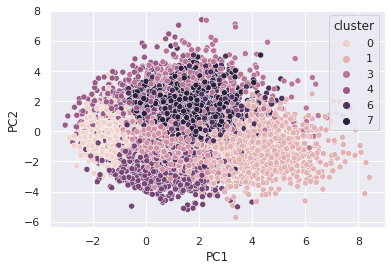

In [ ]:
fig= sns.scatterplot(x='PC1', y='PC2',data=df_pca,hue='cluster')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [5]:
df=pd.read_csv('sentiment.csv',index_col=[0])

In [6]:
df.columns

Index(['artist', 'track_name', 'lyrics', 'popularity', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'genre', 'mode', 'key',
       'duration_ms', 'translate', 'clean_lyrics', 'release_year', 'track_id',
       'clean', 'token', 'Positive Sentiment', 'Neutral Sentiment',
       'Negative Sentiment', 'dominant_sentiment', 'dominant_sentiment_score'],
      dtype='object')

In [ ]:
cat_var=['mode','key','popularity','genre']

In [ ]:
num_var=['acousticness','danceability', 'energy', 'instrumentalness', 
         'liveness', 'loudness','speechiness', 'tempo', 'valence','duration_ms']

* KEY:  12 letter keys 

In [ ]:
df.key.nunique()

12

In [ ]:
df['mode'].unique()

array([1, 0])

## Popularity as cat var

*  I will define above 60 as "popular" since that's the border of the top 25% of songs and encode that as 1, and below 75 as "not popular" and encode that as 0.

In [ ]:
df.loc[df['popularity'] < 57, 'popularity'] = 0 
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.loc[df['popularity'] == 1]

artist      track_name  \
0      Jason Derulo          Swalla   
1      Jason Derulo      Talk Dirty   
2      Jason Derulo          Wiggle   
3      Jason Derulo        Trumpets   
4      Jason Derulo         Tip Toe   
...             ...             ...   
27541       Monsune   OUTTA MY MIND   
27543   Lalo Ebratt  Mala Costumbre   
27545     boy pablo    Sick Feeling   
27546           NAV        Some Way   
27549    Moonstar88        Migraine   

                                                  lyrics  popularity  \
0      Drank Young Money   Love in a thousand differe...         1.0   
1      (Jason, haha Jason Derulo) Haha, get Jazzy on ...         1.0   
2      Ayo, Jason (Oh yeah!) Say somethin to her, hol...         1.0   
3      Every time that you get undressed I hear symph...         1.0   
4      Derulo Whine fa me darlin Way you move ya spin...         1.0   
...                                                  ...         ...   
27541  One, two, three I've been waitin' for the righ...         1.0   
27543  NA Siempre caigo en tu juego, no, no Te aprove...         1.0   
27545  I had to catch the bus Alarm was shaking, oh A...         1.0   
27546  Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...         1.0   
27549  Oo nga pala, hindi nga pala tayo Hanggang dito...         1.0   

       acousticness  danceability  energy  instrumentalness  liveness  \
0             0.075         0.696   0.817          0.000000    0.1870   
1             0.075         0.696   0.817          0.000000    0.1870   
2             0.075         0.696   0.817          0.000000    0.1870   
3             0.075         0.696   0.817          0.000000    0.1870   
4             0.075         0.696   0.817          0.000000    0.1870   
...             ...           ...     ...               ...       ...   
27541         0.066         0.689   0.463          0.000152    0.1450   
27543         0.192         0.715   0.745          0.000011    0.0807   
27545         0.022         0.425   0.504          0.000004    0.3630   
27546         0.101         0.744   0.715          0.000000    0.0919   
27549         0.217         0.664   0.537          0.000003    0.1180   

       loudness  ...    tempo  valence  genre mode  key  duration_ms  \
0        -3.862  ...   98.064    0.782    pop    1    1       216409   
1        -3.862  ...   98.064    0.782    pop    1    1       216409   
2        -3.862  ...   98.064    0.782    pop    1    1       216409   
3        -3.862  ...   98.064    0.782    pop    1    1       216409   
4        -3.862  ...   98.064    0.782    pop    1    1       216409   
...         ...  ...      ...      ...    ...  ...  ...          ...   
27541    -8.121  ...   86.998    0.864    r&b    0    2       226006   
27543    -6.265  ...  191.985    0.802  latin    0    9       220000   
27545   -10.003  ...  165.818    0.403   rock    1    9       155714   
27546    -6.103  ...  154.962    0.340    r&b    1    0       179773   
27549    -6.000  ...  115.049    0.221   rock    1    2       267960   

                                               translate  \
0      Drank Young Money   Love in a thousand differe...   
1      (Jason, haha Jason Derulo) Haha, get Jazzy on ...   
2      Ayo, Jason (Oh yeah!) Say somethin to her, hol...   
3      Every time that you get undressed I hear symph...   
4      Derulo Whine fa me darlin Way you move ya spin...   
...                                                  ...   
27541  One, two, three I've been waitin' for the righ...   
27543  I always fall into your game, no, you do not t...   
27545  I had to catch the bus Alarm was shaking, oh A...   
27546  Yeah, nah, nah, nah, nah, nah, nah, nah, nah N...   
27549  Oo nga pala, hindi nga pala tayo Hanggang dito...   

                                            clean_lyrics release_year  \
0      drank young money love thousand differ fvor wi...         2017   
1      haha get jazzi em im flight get intern first c...         2013 

In [204]:
df_s.describe()

track_popularity  danceability        energy           key  \
count      18194.000000  18194.000000  18194.000000  18194.000000   
mean          42.504562      0.644209      0.692715      5.340827   
std           24.663300      0.150130      0.179366      3.614767   
min            0.000000      0.116000      0.016700      0.000000   
25%           24.000000      0.546000      0.574000      2.000000   
50%           48.000000      0.660000      0.715000      6.000000   
75%           62.000000      0.756000      0.834000      9.000000   
max          100.000000      0.979000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  18194.000000  18194.000000  18194.000000  18194.000000   
mean      -6.752138      0.582280      0.106312      0.174424   
std        2.894560      0.493197      0.102416      0.215997   
min      -34.283000      0.000000      0.022400      0.000001   
25%       -8.220000      0.000000      0.039600      0.016300   
50%       -6.221500      1.000000      0.060200      0.082300   
75%       -4.717000      1.000000      0.131000      0.252000   
max        1.275000      1.000000      0.918000      0.992000   

       instrumentalness      liveness       valence         tempo  \
count      18194.000000  18194.000000  18194.000000  18194.000000   
mean           0.043411      0.189347      0.522838    120.809299   
std            0.150668      0.153377      0.227645     27.635937   
min            0.000000      0.009360      0.000010     37.114000   
25%            0.000000      0.092700      0.347000     98.579750   
50%            0.000007      0.128000      0.524000    120.028500   
75%            0.001370      0.246000      0.702000    136.017750   
max            0.987000      0.996000      0.991000    214.047000   

         duration_ms  Positive Sentiment  Neutral Sentiment  \
count   18194.000000        18194.000000       18194.000000   
mean   230591.541882            0.122388           0.771328   
std     56780.265327            0.101123           0.125739   
min     31893.000000            0.000001           0.000001   
25%    193609.250000            0.049001           0.698001   
50%    221498.000000            0.103001           0.778001   
75%    258090.250000            0.170001           0.858001   
max    517810.000000            1.000001           1.000001   

       Negative Sentiment  
count        18194.000000  
mean             0.103863  
std              0.085443  
min              0.000001  
25%              0.041001  
50%              0.086001  
75%              0.146001  
max              1.000001

In [33]:
df_pop.rename(columns={'track_popularity':'popularity'},inplace=True)

In [34]:
df_pop.loc[(df_pop['popularity']<=29), 'popularity'] =0
df_pop.loc[(df_pop['popularity'] <= 46)&(df_pop['popularity'] > 29), 'popularity'] = 1
df_pop.loc[(df_pop['popularity'] <= 60)&(df_pop['popularity'] > 46), 'popularity'] = 2
df_pop.loc[(df_pop['popularity'] > 60), 'popularity'] = 3


In [35]:
df_pop['popularity'].unique()
       

array([1, 0, 3, 2])

0    5217
3    4999
2    4586
1    3652
Name: popularity, dtype: int64

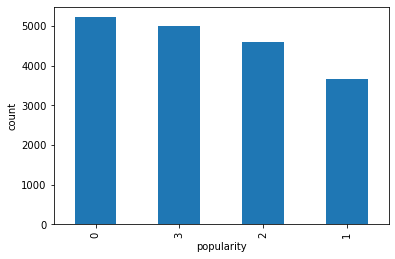

In [36]:
pd.value_counts(df_pop['popularity']).plot.bar()
plt.xlabel('popularity')
plt.ylabel('count')
df_pop['popularity'].value_counts()

# Build Recommender System with lyrics sentiment


In [233]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [44]:
#popularity:
aa.loc[aa['popularity'] < 60, 'popularity'] = 0 
aa.loc[aa['popularity'] >= 60, 'popularity'] = 1


In [45]:
aa['artist_genre']=aa['artist_genre'].apply(lambda x: "".join(x))

In [382]:
pickle.dump(df_content.dropna(),open('song_df.pkl','wb'))

In [381]:
# df_content['artist']=df_content['artist'].apply(lambda x: re.sub(r'\u200b','',x))

In [237]:
df_content=df.copy()

In [239]:
#popularity:
df_content.loc[df_content['popularity'] < 60, 'popularity'] = 0 
df_content.loc[df_content['popularity'] >= 60, 'popularity'] = 1

In [133]:
df_content.head()

artist  track_name  \
0  Jason Derulo      Swalla   
1  Jason Derulo  Talk Dirty   
2  Jason Derulo      Wiggle   
3  Jason Derulo    Trumpets   
4  Jason Derulo     Tip Toe   

                                              lyrics  popularity  \
0  Drank Young Money   Love in a thousand differe...         1.0   
1  (Jason, haha Jason Derulo) Haha, get Jazzy on ...         1.0   
2  Ayo, Jason (Oh yeah!) Say somethin to her, hol...         0.0   
3  Every time that you get undressed I hear symph...         1.0   
4  Derulo Whine fa me darlin Way you move ya spin...         1.0   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0         0.075         0.696   0.817               0.0     0.187    -3.862   
1         0.075         0.696   0.817               0.0     0.187    -3.862   
2         0.075         0.696   0.817               0.0     0.187    -3.862   
3         0.075         0.696   0.817               0.0     0.187    -3.862   
4         0.075         0.696   0.817               0.0     0.187    -3.862   

   ...                track_id  \
0  ...  6kex4EBAj0WHXDKZMEJaaF   
1  ...  6g6A7qNhTfUgOSH7ROOxTD   
2  ...  2sLwPnIP3CUVmIuHranJZU   
3  ...  5KONnBIQ9LqCxyeSPin26k   
4  ...  2z4pcBLQXF2BXKFvd0BuB6   

                                               clean  \
0  drank young money love thousand differ fvor wi...   
1  haha get jazzi em im flight get intern first c...   
2  ayo jason say somethin hol haha got one questi...   
3  everi time get undress hear symphoni head wrot...   
4  derulo whine fa darlin way move ya spine armin...   

                                               token Positive Sentiment  \
0  ['drank', 'young', 'money', 'love', 'thousand'...           0.125001   
1  ['haha', 'get', 'jazzi', 'em', 'im', 'flight',...           0.065001   
2  ['ayo', 'jason', 'say', 'somethin', 'hol', 'ha...           0.092001   
3  ['everi', 'time', 'get', 'undress', 'hear', 's...           0.030001   
4  ['derulo', 'whine', 'fa', 'darlin', 'way', 'mo...           0.102001   

   Neutral Sentiment  Negative Sentiment  dominant_sentiment  \
0           0.710001            0.165001            Negative   
1           0.773001            0.162001            Negative   
2           0.836001            0.072001            Positive   
3           0.877001            0.093001            Negative   
4           0.789001            0.109001            Negative   

  dominant_sentiment_score                                        most_common  \
0                 0.165001  shimmi swal freaki yay gyal im know ya girl do...   
1                 0.162001  talk dirti need dont get booti know got unders...   
2                 0.092001  wiggl make cp babi know big fat butt littl bit...   
3                 0.093001  da ra trumpet go hear song weird everi time ge...   
4                 0.109001  tip like toe ya whine cheek fa darlin tight ho...   

                                       artist_genre  
0  ['dance pop', 'pop', 'pop rap', 'post-teen pop']  
1  ['dance pop', 'pop', 'pop rap', 'post-teen pop']  
2  ['dance pop', 'pop', 'pop rap', 'post-teen pop']  
3  ['dance pop', 'pop', 'pop rap', 'post-teen pop']  
4  ['dance pop', 'pop', 'pop rap', 'post-teen pop']  

[5 rows x 30 columns]

In [259]:
#simple function to create OHE features
#this gets passed later on
def ohe_prep(df, column, new_name): 
    
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

#function to build entire feature set
def create_feature_set(df, float_cols):

    #tfidf genre lists
    tfidf_gerne = TfidfVectorizer()
    tfidf_matrix =  tfidf_gerne.fit_transform(df['artist_genre'].apply(lambda x: "".join(x)))

    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf_gerne.get_feature_names()]
    genre_df.reset_index(drop = True, inplace=True)

    # lyrics_df = pd.DataFrame(lyrics_matrix.toarray())
    # lyrics_df.columns = [ i for i in tfidf_lyrics.get_feature_names()]
    # lyrics_df.reset_index(drop = True, inplace=True)

    year_ohe = ohe_prep(df, 'release_year','year') * 0.5
    popularity_ohe = ohe_prep(df, 'popularity','pop') * 0.15

    #scale float columns
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2

    #concanenate all features
    final = pd.concat([genre_df, floats_scaled, popularity_ohe, year_ohe], axis = 1)
    
    #add song id
    # final['track_id']=df['track_id'].values
    
    return final

In [236]:
float_cols=['acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'duration_ms','dominant_sentiment_score']

In [332]:
song_vector.shape

(1011,)

In [271]:
complete_feature_set=pickle.load(open('complete_feature_set.pkl','rb'))

### Song Vector

In [261]:
song=df_content[(df_content['artist']=="Lady Gaga")&(df_content['track_name']=='Shallow')]

In [264]:
song_vector=song_feature(song,float_cols)

In [265]:
song_vector.shape

(1012,)

In [266]:
complete_feature_set.shape

(22545, 1012)

In [356]:
# from skimage import io
# import matplotlib.pyplot as plt

# def visualize_songs(df):
#     """ 
#     Visualize cover art of the songs in the inputted dataframe

#     Parameters: 
#         df (pandas dataframe): Playlist Dataframe
#     """
    
#     temp = df['url'].values
#     plt.figure(figsize=(15,15))
#     columns = 2
    
#     for i, url in enumerate(temp):
#         plt.subplot(len(temp) / columns + 1, columns, i + 1)

#         image = io.imread(url)
#         plt.imshow(image)
#         plt.xticks(color = 'w', fontsize = 0.5)
#         plt.yticks(color = 'w', fontsize = 0.5)
#         plt.xlabel(df['track_name'].values[i], fontsize = 20)
#         plt.tight_layout(h_pad=0.4, w_pad=0)
#         plt.subplots_adjust(wspace=None, hspace=None)

#     plt.show()

In [358]:
# url=['https://i.scdn.co/image/ab67616d0000b273b241290f873c27bd45d09dd2',
#      'https://i.scdn.co/image/ab67616d0000b273030af18a6a1612a6b880b4ea',
     
#      'https://i.scdn.co/image/ab67616d0000b27353d5d23162d628e13d8420f7',
#      'https://i.scdn.co/image/ab67616d0000b2733899712512f50a8d9e01e951',
#      'https://i.scdn.co/image/ab67616d0000b2734f2da18ec94ea56bcc36694b'
     
#      ]
# df_playlist

In [275]:
def recommend(df, song_vector, complete_features):
    
    if 'track_id' in song_vector.index:
        song_vector=song_vector.drop('track_id',axis=0)
    if 'track_id' in complete_features.columns:
        complete_features=complete_features.drop('track_id',axis=1)
 
    df['sim'] = cosine_similarity(complete_features.values, song_vector.values.reshape(1, -1))[:,0]
    print(df.shape)
    reco = df[df['popularity']==1].sort_values('sim',ascending = False).head(30)
    recommendation=recoa[['track_name','artist','sim']]
#   

    return recommendation,reco


In [271]:

# complete_feature_set=complete_feature_set.drop('track_id', axis = 1)

In [277]:
a[a['artist']!="Ariana Grande"]

track_name           artist  \
625                                 Shallow - Radio Edit        Lady Gaga   
624                                              Shallow        Lady Gaga   
15989                                               Team       Noah Cyrus   
10373                                            Suncity           Khalid   
10396                         Suncity (feat. Empress Of)           Khalid   
10370                                                OTW           Khalid   
16366                                                CPR    Summer Walker   
20922                   Don't Let Me Down (feat. Khalid)  Sabrina Claudio   
9839          Sweet but Psycho - Morgan Page Dance Remix          Ava Max   
20924                                  Messages From Her  Sabrina Claudio   
10395                           Love Lies (with Normani)           Khalid   
1976                          What Lovers Do (feat. SZA)         Maroon 5   
16363                                               Deep    Summer Walker   
535                          Always Remember Us This Way        Lady Gaga   
578                                    Look What I Found        Lady Gaga   
560                                     Is That Alright?        Lady Gaga   
20485  Way Back Home (feat. Conor Maynard) - Sam Feld...            SHAUN   
4921                                          Go to Town         Doja Cat   
9781                                Not Your Barbie Girl          Ava Max   
4917                                               Candy         Doja Cat   

            sim  
625    0.913557  
624    0.912482  
15989  0.905654  
10373  0.902150  
10396  0.902013  
10370  0.901232  
16366  0.901000  
20922  0.900841  
9839   0.900052  
20924  0.899500  
10395  0.896995  
1976   0.896786  
16363  0.896776  
535    0.896401  
578    0.896346  
560    0.895617  
20485  0.894606  
4921   0.893457  
9781   0.893123  
4917   0.893087

In [162]:
df_a.columns

NameError: name 'df_a' is not defined